# 1. Importar Librerías

In [70]:
import numpy as np
import joblib ### para cargar array
import keras_tuner as kt

########Paquetes para NN #########
import tensorflow as tf
from sklearn import metrics ### para analizar modelo
from sklearn.ensemble import RandomForestClassifier  ### para analizar modelo

# 2. Importar Datos

In [71]:
x_train = joblib.load('salidas\\x_train.pkl')
y_train = joblib.load('salidas\\y_train.pkl')
x_test = joblib.load('salidas\\x_test.pkl')
y_test = joblib.load('salidas\\y_test.pkl')


# 3. Modelos

## 3.1. Modelo Random Forest Classifier

In [72]:
x_test.shape

(1737, 100, 100, 3)

In [73]:
x_train2=x_train.reshape(6953,30000)
x_test2=x_test.reshape(1737, 30000)
x_train2.shape
x_test2.shape

(1737, 30000)

In [74]:
rf=RandomForestClassifier()
rf.fit(x_train2, y_train)

c:\Analitica 3\brain-tumor-detection\environment\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

In [75]:
print('------------------------TRAIN---------------------------')
pred_train = rf.predict_proba(x_train2)[:, 1]
pred_train = (pred_train > 0.98).astype(int)
print(metrics.classification_report(y_train, pred_train))
metrics.roc_auc_score(y_train, pred_train)

print()
print('------------------------TEST---------------------------')
pred_test = rf.predict_proba(x_test2)[:, 1]
pred_test = (pred_test > 0.98).astype(int)
print(metrics.classification_report(y_test, pred_test))
metrics.roc_auc_score(y_test, pred_test)

------------------------TRAIN---------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2864
           1       1.00      0.77      0.87      4089

    accuracy                           0.86      6953
   macro avg       0.88      0.88      0.86      6953
weighted avg       0.90      0.86      0.86      6953


------------------------TEST---------------------------
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       716
           1       1.00      0.57      0.73      1021

    accuracy                           0.75      1737
   macro avg       0.81      0.79      0.75      1737
weighted avg       0.84      0.75      0.75      1737



0.7874632713026445

## 3.2. Red Neuronal Estándar

In [76]:
fc_model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Analitica 3\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [77]:
##### configura el optimizador y la función para optimizar ##############
fc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', 'Recall', 'Precision'])

In [78]:
#####Entrenar el modelo usando el optimizador y arquitectura definidas #########
fc_model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - AUC: 0.7642 - Precision: 0.7702 - Recall: 0.6977 - accuracy: 0.7100 - loss: 0.7127 - val_AUC: 0.9418 - val_Precision: 0.8267 - val_Recall: 0.9814 - val_accuracy: 0.8682 - val_loss: 0.3501
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - AUC: 0.9477 - Precision: 0.9112 - Recall: 0.9224 - accuracy: 0.9007 - loss: 0.2944 - val_AUC: 0.9819 - val_Precision: 0.9829 - val_Recall: 0.8443 - val_accuracy: 0.8998 - val_loss: 0.2685
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - AUC: 0.9802 - Precision: 0.9530 - Recall: 0.9485 - accuracy: 0.9423 - loss: 0.1871 - val_AUC: 0.9808 - val_Precision: 0.9486 - val_Recall: 0.9755 - val_accuracy: 0.9545 - val_loss: 0.1641
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - AUC: 0.9874 - Precision: 0.9611 - Recall: 0.9678 - accuracy: 0.9575 - loss: 0.1444 - val_AUC: 0.9836 - val_Precision: 0.9748 - val_Recall: 0.9491 - val_accuracy: 0.9557 - val_loss: 0.1574
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━

In [79]:
#########Evaluar el modelo ####################
test_loss, test_acc, test_auc, test_recall, test_precision = fc_model.evaluate(x_test, y_test, verbose=2)
print("Test auc:", test_auc)

55/55 - 0s - 6ms/step - AUC: 0.9915 - Precision: 0.9741 - Recall: 0.9931 - accuracy: 0.9804 - loss: 0.0991
Test auc: 0.991457998752594


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       716
           1       0.99      0.86      0.92      1021

    accuracy                           0.91      1737
   macro avg       0.91      0.93      0.91      1737
weighted avg       0.93      0.91      0.92      1737



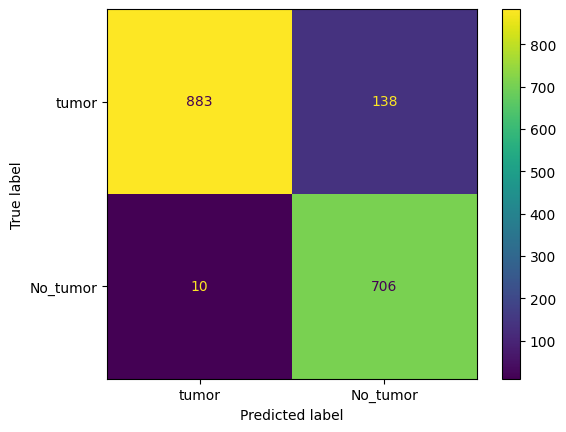

In [80]:
###### matriz de confusión test
pred_test=(fc_model.predict(x_test) > 0.98).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test))


In [81]:
import plotly.express as px
p = fc_model.predict(x_test)
hist= px.histogram(p)
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


## 3.3. Red Neuronal Convolucional

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Analitica 3\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [83]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [84]:
# Train the model for 10 epochs
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - AUC: 0.8530 - loss: 0.4558 - val_AUC: 0.9867 - val_loss: 0.1449
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - AUC: 0.9881 - loss: 0.1335 - val_AUC: 0.9923 - val_loss: 0.1000
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - AUC: 0.9938 - loss: 0.0907 - val_AUC: 0.9941 - val_loss: 0.0806
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - AUC: 0.9979 - loss: 0.0518 - val_AUC: 0.9915 - val_loss: 0.0949
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - AUC: 0.9989 - loss: 0.0405 - val_AUC: 0.9961 - val_loss: 0.0569
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - AUC: 0.9994 - loss: 0.0289 - val_AUC: 0.9946 - val_loss: 0.0559
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - AUC: 0.9999 - loss: 0.0101 - val_AUC: 0.9954 - val_loss: 0.0468
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - AUC: 1.0000 - loss: 0.0088 - val_AUC: 0.9957 - val_loss: 0.0502
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       716
           1       0.99      0.97      0.98      1021

    accuracy                           0.98      1737
   macro avg       0.98      0.98      0.98      1737
weighted avg       0.98      0.98      0.98      1737



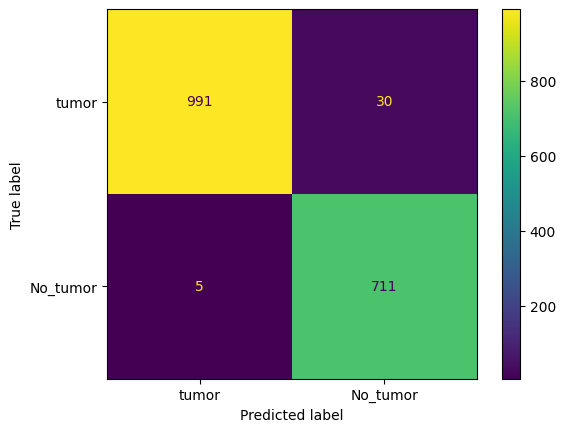

In [85]:
pred_test1=(model.predict(x_test) >= 0.98).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test1, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test1))


In [86]:
p = model.predict(x_test)
hist= px.histogram(p)
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [87]:
falsos_n = []

# Iterar sobre las predicciones y las etiquetas verdaderas
for i in range(len(pred_test1)):
    # Si la predicción es 0 (no hay tumor) 
    if pred_test1[i] == 0 and y_test[i] == 1:
        falsos_n.append(i)

falsos_n

[716,
 767,
 774,
 781,
 782,
 791,
 803,
 970,
 1088,
 1100,
 1214,
 1224,
 1230,
 1237,
 1238,
 1273,
 1424,
 1442,
 1563,
 1626,
 1706,
 1723,
 1726,
 1727,
 1728,
 1731,
 1732,
 1734,
 1735,
 1736]

In [88]:
falsos_p = []

# Iterar sobre las predicciones y las etiquetas verdaderas
for i in range(len(pred_test1)):
    if pred_test1[i] == 1 and y_test[i] == 0:
        falsos_p.append(i)

falsos_p

[146, 412, 415, 457, 473]

In [89]:
reg_strength = 0.001

In [90]:
dropout_rate = 0.1  

### Afinamiento de hiperparametros

In [105]:

hp = kt.HyperParameters()

def build_model(hp):
    dropout_rate=hp.Float('DO', min_value=0.05, max_value= 0.2, step=0.05)
    reg_strength = hp.Float("rs", min_value=0.0001, max_value=0.0005, step=0.0001)
    optimizer = hp.Choice('optimizer', ['adam', 'sgd']) # en el contexto no se debería afinar

    model1 =  tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=0.001)
    else:
        opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
   
    model1.compile(
        optimizer=opt, loss="binary_crossentropy", metrics=["Recall", "AUC"],
    )
    return model1

In [106]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    hyperparameters=hp,
    tune_new_entries=True, 
    objective=kt.Objective("AUC", direction="max"),
    max_trials=5,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld", 
)

c:\Analitica 3\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [107]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=100)

fc_best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 02m 24s]
AUC: 0.9425405263900757

Best AUC So Far: 0.9999760389328003
Total elapsed time: 00h 12m 34s


c:\Analitica 3\brain-tumor-detection\environment\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 



In [109]:
tuner.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="AUC", direction="max")

Trial 3 summary
Hyperparameters:
DO: 0.2
rs: 0.0005
optimizer: adam
Score: 0.9999760389328003

Trial 0 summary
Hyperparameters:
DO: 0.1
rs: 0.0001
optimizer: adam
Score: 0.9999127984046936

Trial 4 summary
Hyperparameters:
DO: 0.05
rs: 0.0005
optimizer: sgd
Score: 0.9425405263900757

Trial 2 summary
Hyperparameters:
DO: 0.2
rs: 0.0005
optimizer: sgd
Score: 0.9194196462631226

Trial 1 summary
Hyperparameters:
DO: 0.1
rs: 0.00030000000000000003
optimizer: sgd
Score: 0.9182038307189941


In [111]:
fc_best_model.save("salidas\\best_model.h5")